### Try out your code here

In [10]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

#### death in each state vs political view

In [87]:
df3

,sex,age,educ,polit,wear_mask,social_distance,age_encoded
0,Male,18-29 years old,HSDIPLOMA,REPUBLICAN,1.0,1.0,0
1,Female,40-49 years old,BACHELORS,OTHER,0.0,1.0,2
2,Female,30-39 years old,MASTERS,OTHER,0.0,1.0,1
3,Female,50-59 years old,BACHELORS,OTHER,0.0,1.0,3
4,Female,60-69 years old,BACHELORS,DEMOCRAT,0.0,0.0,4
...,...,...,...,...,...,...,...
6296,Male,40-49 years old,MASTERS,REPUBLICAN,0.0,1.0,2
6297,Male,30-39 years old,BACHELORS,OTHER,0.0,1.0,1
6306,Male,60-69 years old,HSDIPLOMA,DEMOCRAT,1.0,1.0,4
6307,Male,40-49 years old,HSDIPLOMA,OTHER,0.0,0.0,2


In [88]:
dfPolit = df3[['polit','wear_mask','social_distance']]
dfPolit['state'] = df2[['state']]
dfPolit

,polit,wear_mask,social_distance,state
0,REPUBLICAN,1.0,1.0,Illinois
1,OTHER,0.0,1.0,Ohio
2,OTHER,0.0,1.0,Minnesota
3,OTHER,0.0,1.0,Mississippi
4,DEMOCRAT,0.0,0.0,Connecticut
...,...,...,...,...
6296,REPUBLICAN,0.0,1.0,New Jersey
6297,OTHER,0.0,1.0,Ohio
6306,DEMOCRAT,1.0,1.0,Arkansas
6307,OTHER,0.0,0.0,Louisiana


In [89]:
repState = dfPolit[dfPolit['polit'] == 'REPUBLICAN']['state'].value_counts() # people who are republican and their states
demoState = dfPolit[dfPolit['polit'] == 'DEMOCRAT']['state'].value_counts() # people who are democrats and their states

In [90]:
print("Total Number of Polit:\n ", df2['polit'].value_counts()) 

Total Number of Polit:
  OTHER         2032
DEMOCRAT      1684
REPUBLICAN    1282
Name: polit, dtype: int64


### Number Of republicans per each state: How can we use this data?

In [91]:

repState.head(9)

New York        94
Pennsylvania    84
Texas           78
Ohio            66
Michigan        63
Florida         54
Illinois        49
Georgia         46
California      43
Name: state, dtype: int64

### Number Of Democrats per each state

In [92]:
print("Total Number of Polit:\n ", df2['polit'].value_counts()) #DEMOCRAT
demoState.head(9)

Total Number of Polit:
  OTHER         2032
DEMOCRAT      1684
REPUBLICAN    1282
Name: polit, dtype: int64


New York        136
Pennsylvania    114
Michigan         99
California       91
Ohio             79
Illinois         74
Florida          72
New Jersey       64
Minnesota        52
Name: state, dtype: int64

### which state wear mask more? compare that to the number of cases in that state, use the top 5 states
### which state apply social distancing the most? compare that to the number of cases in that state
 

# polit vs mask wearing vs state and republicans

In [93]:
#dfPolit = dfPolit.drop(["social_distance"], axis = 1)
# mask = dfPolit1.groupby(['polit', 'wear_mask', 'state']).count().unstack(level=1).max()
# mask = mask.dropna() # drop nan values
# mask
#dfPolit
# count the. number people who are repblican in some state and wear mask
# count the. number people who are repblican in some state and  doesn't wear mask
# count the. number people who are democrats in some state and wear mask
# count the. number people who are democrats in some state and  doesn't wear mask
# count the. number people who are democrats in some state and wear mask
# count the. number people who are democrats in some state and  doesn't wear mask



dfPolitMw = dfPolit.drop(["social_distance"], axis = 1) # drop social_distance column
dfPolitMw = dfPolitMw.loc[(dfPolit['polit'] == 'REPUBLICAN') &(dfPolit['wear_mask'] == 0) ] # poloit, wear_mask, state 

dfPolitMw.head(10)


,polit,wear_mask,state
10,REPUBLICAN,0.0,New Hampshire
11,REPUBLICAN,0.0,Ohio
12,REPUBLICAN,0.0,Tennessee
13,REPUBLICAN,0.0,Texas
14,REPUBLICAN,0.0,South Carolina
16,REPUBLICAN,0.0,Pennsylvania
20,REPUBLICAN,0.0,Ohio
22,REPUBLICAN,0.0,Missouri
23,REPUBLICAN,0.0,California
24,REPUBLICAN,0.0,New York


### people who are republican and their state

In [94]:
dfPolitMw = dfPolitMw.groupby('state')["polit"].count() # gets the number of people who are wearing mask in each state
dfPolitMw = dfPolitMw.sort_values(ascending=True) # sort it in asending 

dfPolitMw.head()

state
Alaska          1
Hawaii          1
New Mexico      2
Delaware        3
Rhode Island    4
Name: polit, dtype: int64

### visualize who the number of republicans not wearing mask in each state

Text(0, 0.5, 'Count')

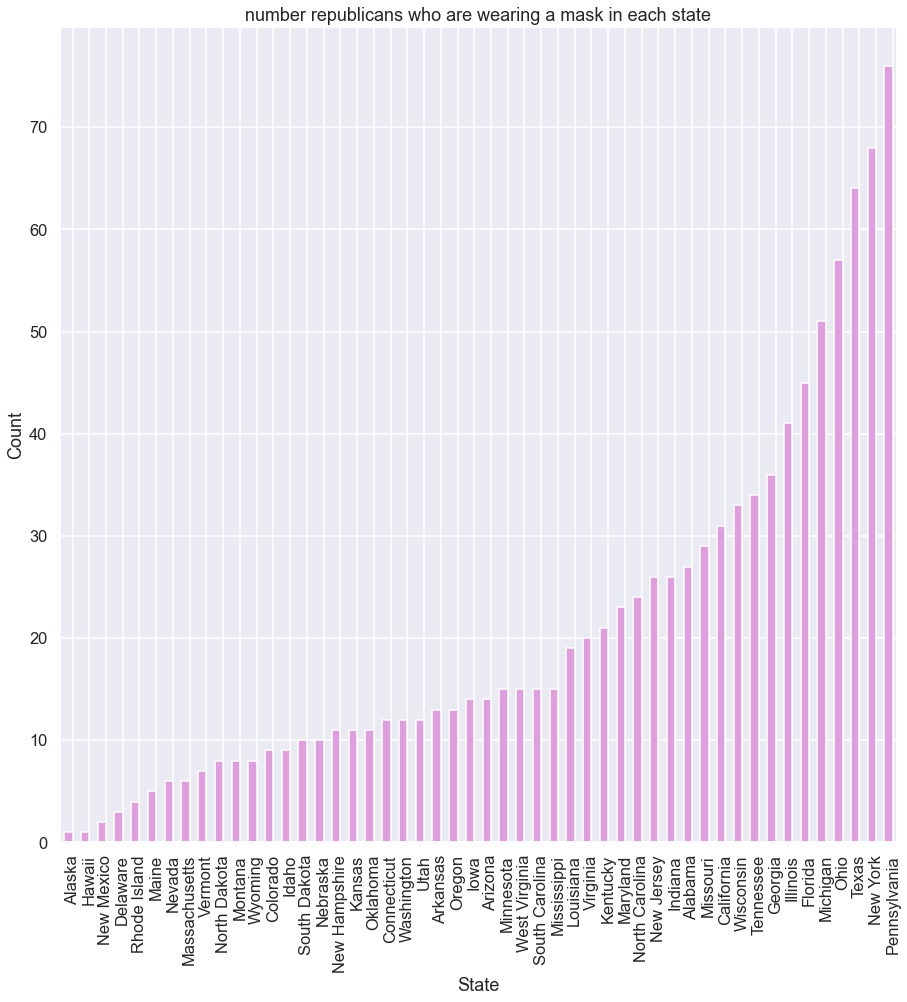

In [95]:
dfPolitMw.plot.bar(title = "number republicans who are wearing a mask in each state", figsize=(15,15), 
                              color = 'plum', position = 1.0)

plt.xlabel('State')
plt.ylabel('Count')

# problem:
- pennsylvania is not in the second data: therefore it would be a problem for data consistency 

### the second state that is not wear_mask is New york, let's visualize the number of case, death, and the death rate:

In [96]:
dfTwo_newYork = dfTwoImp.loc[dfTwoImp['State and Territory'] == 'New York City']
dfTwo_newYork

NameError: name 'dfTwoImp' is not defined

In [ ]:

dfTwo_newYork.plot.bar(y = ['Total Cases','Confirmed Cases',
                                    
                                    'Case Rate per 100000',
                                    'Confirmed Deaths','Death Rate per 100000']
                              ,title =
                       "Total Cases,Confirmed Cases,Case Rate per 100000 Total Deaths, Confirmed Deaths Death Rate per 100000\n in New York City\n"
                       , figsize=(8,8), 
                              color = ['r',"b","c","y","g"], position = 1.0,  rot=0)


plt.xlabel('New York City')
plt.ylabel('Death')
plt.ylim(0, 350000)


- This only shows that their is a direct relationship between not wearing mask and [total case, death]

# Linear Regression: For Data 1

The relationship between **mask wearing, Social distancing** and **Sex** using linear regression:

First Check assumptions:
    
    - Linear relationship
    - Multivariate normality
    - No multicollinearity
    - No auto-correlation
    - Homoscedasticity
- Ho (null hypothesis) = There is no relationship no between gender and mask wearing rate
- H1 = There is a relationship between poverty percentage and teen birth rate 

# First lets see the relationship between male and mask wearing 

In [97]:
#df3

In [98]:

df3Male = df3.loc[(df3['sex'] == 'Male')]
df3Male

,sex,age,educ,polit,wear_mask,social_distance,age_encoded
0,Male,18-29 years old,HSDIPLOMA,REPUBLICAN,1.0,1.0,0
10,Male,60-69 years old,HSDIPLOMA,REPUBLICAN,0.0,1.0,4
14,Male,50-59 years old,HSDIPLOMA,REPUBLICAN,0.0,1.0,3
16,Male,30-39 years old,HSDIPLOMA,REPUBLICAN,0.0,1.0,1
19,Male,30-39 years old,BACHELORS,DEMOCRAT,0.0,1.0,1
...,...,...,...,...,...,...,...
6296,Male,40-49 years old,MASTERS,REPUBLICAN,0.0,1.0,2
6297,Male,30-39 years old,BACHELORS,OTHER,0.0,1.0,1
6306,Male,60-69 years old,HSDIPLOMA,DEMOCRAT,1.0,1.0,4
6307,Male,40-49 years old,HSDIPLOMA,OTHER,0.0,0.0,2


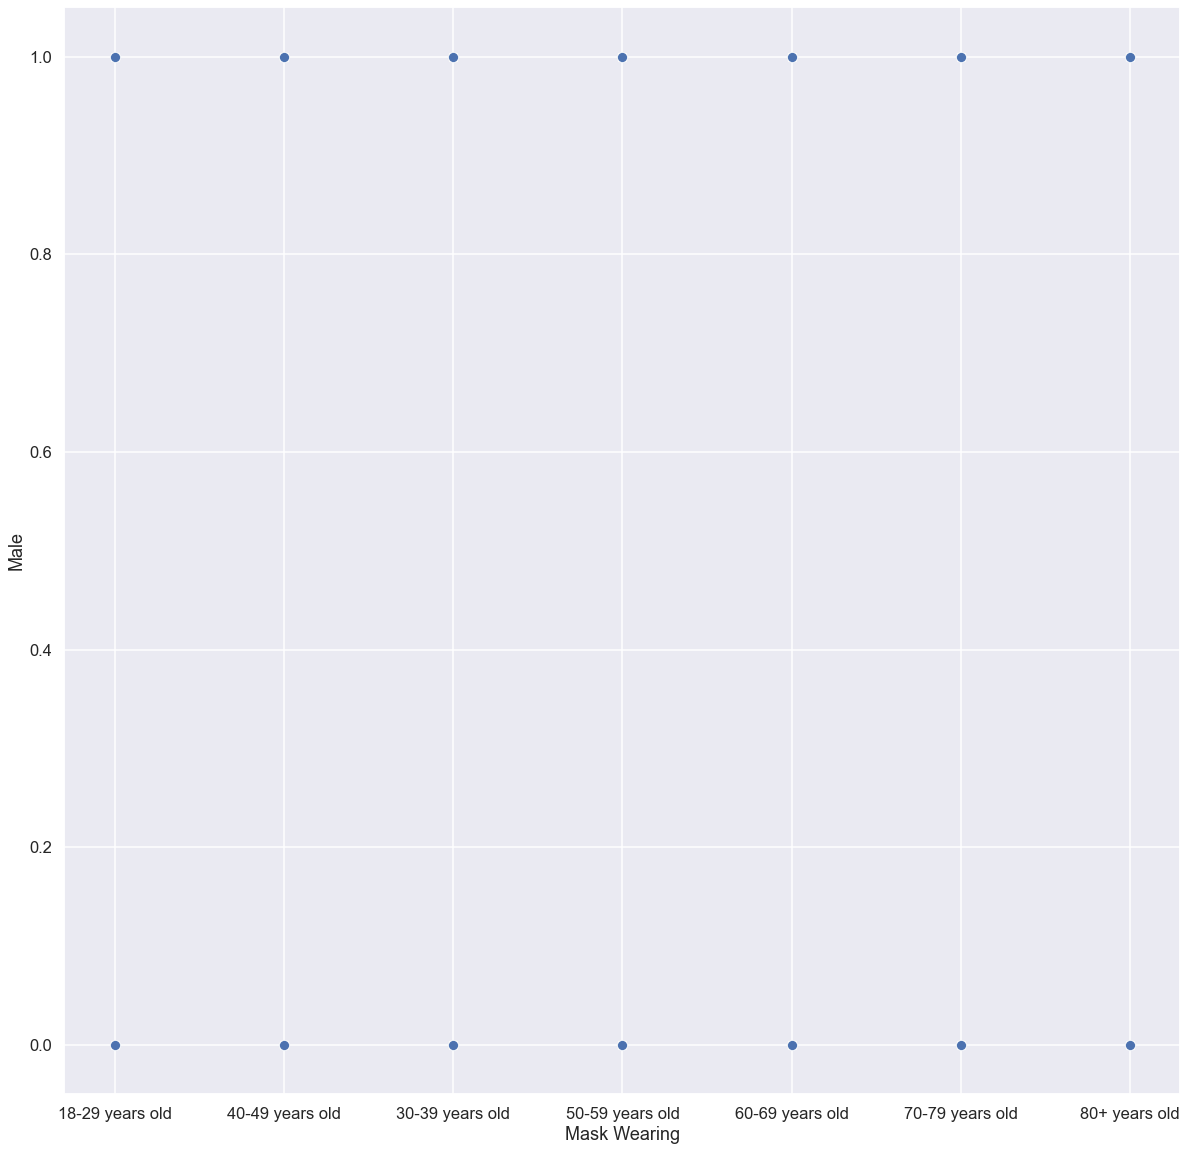

In [99]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='age', y='wear_mask', data=df3, s=100)
plt.xlabel('Mask Wearing')
plt.ylabel('Male');

### To do regression anlysis we need something that change over time:
   thats why we use  **y=mx+b equation**
        
### We won't be able to do this for the first data:
   **it fails Linear relationship**

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
df3['age'].value_counts()

df3['age_encoded'] = LabelEncoder().fit_transform(df3['age'])
df3[['age', 'age_encoded']] # special syntax to get just these two columns
df3

,sex,age,educ,polit,wear_mask,social_distance,age_encoded
0,Male,18-29 years old,HSDIPLOMA,REPUBLICAN,1.0,1.0,0
1,Female,40-49 years old,BACHELORS,OTHER,0.0,1.0,2
2,Female,30-39 years old,MASTERS,OTHER,0.0,1.0,1
3,Female,50-59 years old,BACHELORS,OTHER,0.0,1.0,3
4,Female,60-69 years old,BACHELORS,DEMOCRAT,0.0,0.0,4
...,...,...,...,...,...,...,...
6296,Male,40-49 years old,MASTERS,REPUBLICAN,0.0,1.0,2
6297,Male,30-39 years old,BACHELORS,OTHER,0.0,1.0,1
6306,Male,60-69 years old,HSDIPLOMA,DEMOCRAT,1.0,1.0,4
6307,Male,40-49 years old,HSDIPLOMA,OTHER,0.0,0.0,2


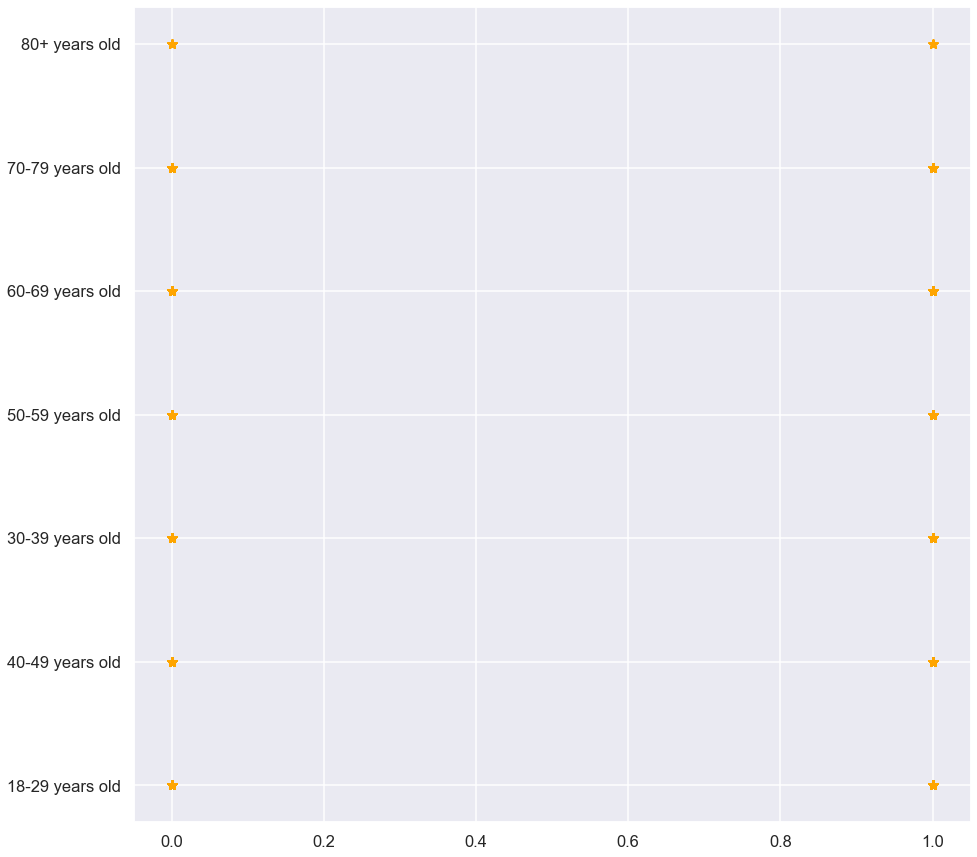

In [102]:
plt.figure(figsize=(15,15))
plt.scatter(df3.wear_mask, df3.age, marker = '*', color = 'orange')

Now Train and Test:

In [103]:
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(df3[['age_encoded']], df3.wear_mask, test_size = 0.00)  # using 0.2 of the data for prediction result
#x = df3[['age_encoded']]   
#y = df3.wear_mask 
#y                                        
                                                             

In [104]:

# so df3 has a size of 4998 datas, we are choosing to predict the result of 
# 0.2% of 4998 if they wear mask or not
#X_test # X_shape = 1000
#X_test.shape

#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=40) 

In [105]:
#model = LogisticRegression()

In [106]:
#model.fit(X_train,y_train) # training 
#y_pred=model.predict(X_test)


In [107]:
from sklearn.metrics import classification_report
from sklearn import metrics
#confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#confusion_matrix = pd.crosstab(X_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
#sn.heatmap(confusion_matrix, annot=True)

#print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
#plt.show()
#confusion_matrix
#print(classification_report(y_test, y_pred))

In [108]:
model.score(X_test,y_test) 

0.84

In [109]:
df3Age = df3.loc[(df3['age_encoded'])]
df3Age = df3Age.drop(['sex','age','educ','polit'], axis =1)
df3Age


,wear_mask,social_distance,age_encoded
0,1.0,1.0,0
2,0.0,1.0,1
1,0.0,1.0,2
3,0.0,1.0,3
4,0.0,0.0,4
...,...,...,...
2,0.0,1.0,1
1,0.0,1.0,2
4,0.0,0.0,4
2,0.0,1.0,1


In [110]:
x = df3Age[['age_encoded']]   
y = df3Age.wear_mask 

In [111]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 
model = LogisticRegression()
model.fit(X_train,y_train) # training 
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       840
         1.0       0.00      0.00      0.00       160

    accuracy                           0.84      1000
   macro avg       0.42      0.50      0.46      1000
weighted avg       0.71      0.84      0.77      1000



In [112]:
print(confusion_matrix(y_test, y_pred))

[[840   0]
 [160   0]]


In [113]:

model.score(X_test,y_test) 

0.84